In [1]:
import pydicom
import os,re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import math
import sys

sys.path.append("..")
import registration_utilities as ru
import registration_callbacks as rc
import AssistVisualization as vis

from MyProcessDicom import *
from LocalDicomIO import *
from RegistrationMethod import *

import cv2

transform_path = "./data/9941446R/transform/"
if not os.path.isdir(transform_path):
    os.mkdir(transform_path)

In [16]:
# The first image should not be Coronal plane 整个文件夹里只应该有横断面的数据!!!
file_path = "./data/9941446R/TP0"
img_array, fixed_image = read_dicom_image(file_path)
file_path = "./data/9941446R/TP10"
img_array, moving_image = read_dicom_image(file_path)
show_images(fixed_image, moving_image)

75
size = (384, 384, 75)
75
size = (384, 384, 75)


interactive(children=(IntSlider(value=37, description='fixed_image_z', max=74), IntSlider(value=37, descriptio…

In [17]:
img1 = fixed_image
img2 = moving_image

In [4]:
# img1 = resample_image(fixed_image)
# img2 = resample_image(moving_image)

In [5]:
# fixed_image = adaptive_thresh(img1)
# moving_image = adaptive_thresh(img2)
# interact(display_images, fixed_image_z=(0,fixed_image.GetSize()[2]-1), moving_image_z=(0,moving_image.GetSize()[2]-1), 
#          fixed_npa = fixed(sitk.GetArrayViewFromImage(fixed_image)), moving_npa=fixed(sitk.GetArrayViewFromImage(moving_image)));

In [25]:
def preprocess(images):
    tmp_img = do_thresh(images)
    tmp_img = adaptive_thresh(tmp_img)
    return tmp_img

In [26]:
fixed_image = preprocess(img1)
moving_image = preprocess(img2)
show_images(fixed_image, moving_image)

interactive(children=(IntSlider(value=37, description='fixed_image_z', max=74), IntSlider(value=37, descriptio…

In [21]:
# initial transform
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

moving_resampled = sitk.Resample(moving_image, fixed_image, initial_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2]-1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

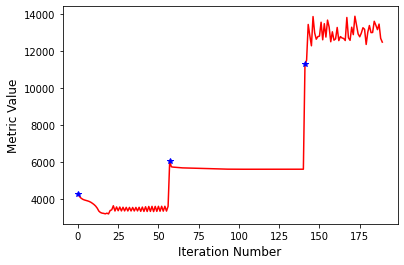

Final metric value: 13380.580801097572
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 49.


In [27]:
affine_transform = affine_registration(fixed_image, moving_image)

In [7]:
# affine_transform = affine_registration(fixed_image, moving_image)
affine_transform = sitk.ReadTransform(transform_path+"affineTP1to0.tfm")

In [28]:
moving_resampled = transform_img(fixed_image, moving_image, affine_transform)
show_mixed_images(fixed_image, moving_resampled)

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

In [17]:
sitk.WriteTransform(affine_transform, transform_path+"affineTP1to0.tfm")

In [18]:
affine = sitk.ReadTransform(transform_path+"affineTP1to0.tfm")

In [29]:
moving_resampled2 = transform_img(empty_preprocess(img1), empty_preprocess(img2), affine_transform)
show_mixed_images(empty_preprocess(img1), moving_resampled2)

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

In [26]:
img2 = transform_img(empty_preprocess(img1), empty_preprocess(img2), affine_transform)
moving_image = moving_resampled

In [79]:
write_dicom_series(moving_resampled, "./data/9404954L/resample", "tmp_test")

In [21]:
# fixed_points, moving_points = generate_random_pointset(fixed_image, moving_image, 100)

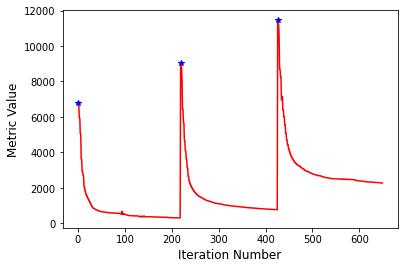

Final metric value: 2275.485964187096
Optimizer's stopping condition, LBFGSBOptimizerv4: User requested


In [28]:
ffd_transform = bspline_intra_modal_registration(fixed_image = fixed_image, 
                                    moving_image = moving_image,
#                                     fixed_points=fixed_points, 
#                                     moving_points=moving_points
                                    )
# 上面取消注释会报错module 'SimpleITK' has no attribute 'CompositeTransform'，但文档里c++版本是有这个类的

In [30]:
# moving_resampled3 = transform_img(empty_preprocess(img1), empty_preprocess(img2), ffd_transform)
show_images(empty_preprocess(img1), moving_resampled3)

interactive(children=(IntSlider(value=37, description='fixed_image_z', max=74), IntSlider(value=37, descriptio…

In [40]:
moving_resampled = sitk.Resample(moving_image, fixed_image, ffd_transform, sitk.sitkBSpline, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=154, description='image_z', max=308), FloatSlider(value=0.5, description…

In [42]:
moving_image = empty_preprocess(img2)
fixed_image = empty_preprocess(img1)
moving_resampled = sitk.Resample(moving_image, fixed_image, ffd_transform, sitk.sitkBSpline, 0.0, moving_image.GetPixelID())
interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=154, description='image_z', max=308), FloatSlider(value=0.5, description…

In [43]:
write_dicom_series(moving_resampled, "./data/9404954L/resample", "TPthresh_8to0")

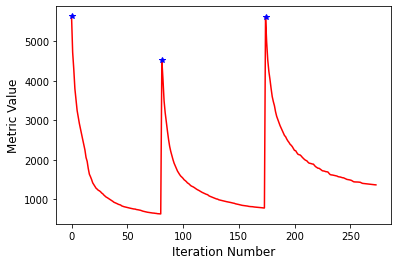

Final metric value: 1364.8470368659468
Optimizer's stopping condition, Reached maximum number of iterations


In [70]:
ffd_transform2 = bspline_intra_modal_registration2(fixed_image = fixed_image, 
                                    moving_image = moving_image,
#                                     fixed_points=fixed_points, 
#                                     moving_points=moving_points
                                    )
# 上面取消注释会报错module 'SimpleITK' has no attribute 'CompositeTransform'，但文档里c++版本是有这个类的

In [71]:
moving_resampled = sitk.Resample(moving_image, fixed_image, ffd_transform2, sitk.sitkBSpline, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

Initial alignment errors in millimeters, mean(std): 11.07(0.06), max: 11.24
Final alignment errors in millimeters, mean(std): 5.77(1.94), max: 10.68


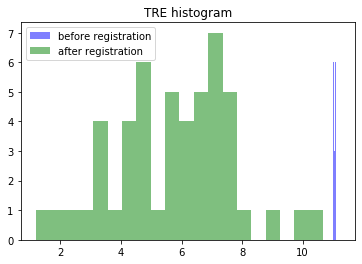

In [38]:
initial_errors_mean, initial_errors_std, _, initial_errors_max, initial_errors = ru.registration_errors(sitk.Euler3DTransform(),fixed_points, moving_points)
final_errors_mean, final_errors_std, _, final_errors_max, final_errors = ru.registration_errors(ffd_transform, fixed_points, moving_points)

plt.hist(initial_errors, bins=20, alpha=0.5, label='before registration', color='blue')
plt.hist(final_errors, bins=20, alpha=0.5, label='after registration', color='green')
plt.legend()
plt.title('TRE histogram');
print('Initial alignment errors in millimeters, mean(std): {:.2f}({:.2f}), max: {:.2f}'.format(initial_errors_mean, initial_errors_std, initial_errors_max))
print('Final alignment errors in millimeters, mean(std): {:.2f}({:.2f}), max: {:.2f}'.format(final_errors_mean, final_errors_std, final_errors_max))

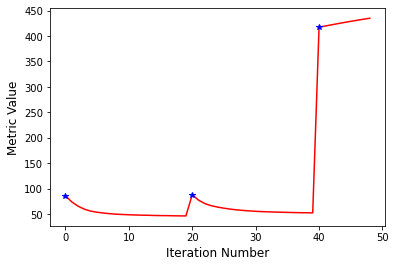

Final metric value: 436.9191863265349
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.


In [15]:
demons_transform = demons_registration(fixed_image = fixed_image, 
                                    moving_image = moving_image,
                                    )

In [24]:
resampled = transform_img(fixed_image, moving_image, demons_transform)
show_mixed_images(fixed_image, resampled)

NameError: name 'demons_transform' is not defined

In [ ]:
#############################################################################
# END
############################################################################